In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/dataset"

Test  Train


In [0]:
# Imports here
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import torch
import numpy as np
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from PIL import Image
from collections import OrderedDict
import json
import torchvision 
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
import pdb

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True) 
from torch.utils.tensorboard import SummaryWriter


In [0]:
data_dir = "/content/drive/My Drive/dataset/"
train_dir = data_dir + '/Train'
test_dir = data_dir + '/Test'
using_gpu = torch.cuda.is_available()

In [0]:
train_set  = torchvision.datasets.ImageFolder(train_dir, 
                                        transform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])

 )

In [0]:
test_set  = torchvision.datasets.ImageFolder(test_dir , 
                                        transform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])

 )

In [0]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True)

In [0]:
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100, shuffle=True)

In [0]:
classes = ('benign','malignant')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


benign malignant malignant malignant


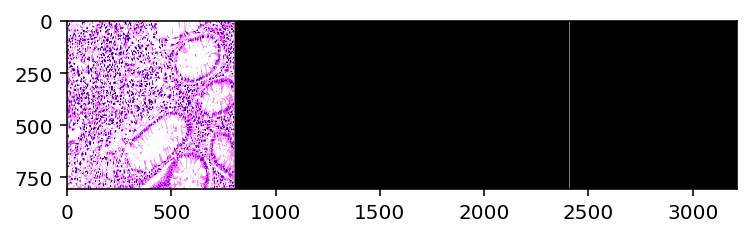

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()


In [0]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 12, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(12*197*197, 120)
        self.fc2 = nn.Linear(120, 60)
        self.fc3 = nn.Linear(60, 2)
        


    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    # Reshaping the tensor to BATCH_SIZE x 320. Torch infers this from other dimensions when one of the parameter is -1.
        x = x.view(-1, 12 * 197 * 197)
        x = F.relu(self.fc1(x))
        x = F.dropout(x)
        x = F.relu(self.fc2(x))
        x = F.dropout(x)
        x = self.fc3(x)
        
        return x

In [0]:
network = Network()

In [0]:
for name, param in network.named_parameters():
    print(name,'\t\t',param.shape)

In [0]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10,shuffle=True)
optimizer = optim.SGD(network.parameters(), lr=0.01)
  

In [17]:
for epoch in range(200):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch # completed 6000 image in single epoch with 
                               # batch size 100 
        images, labels = batch 

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad() # doning zero grad value after every mini batch 
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )



epoch 0 total_correct: 81 loss: 13.678513169288635
epoch 1 total_correct: 72 loss: 12.034208357334137
epoch 2 total_correct: 86 loss: 11.805805146694183
epoch 3 total_correct: 93 loss: 11.746697723865509
epoch 4 total_correct: 92 loss: 11.581272840499878
epoch 5 total_correct: 97 loss: 11.549345016479492
epoch 6 total_correct: 97 loss: 11.782423615455627
epoch 7 total_correct: 95 loss: 11.804763972759247
epoch 8 total_correct: 93 loss: 11.728138983249664
epoch 9 total_correct: 101 loss: 11.428460896015167
epoch 10 total_correct: 93 loss: 11.823866605758667
epoch 11 total_correct: 96 loss: 11.66033285856247
epoch 12 total_correct: 95 loss: 11.716653227806091
epoch 13 total_correct: 96 loss: 11.627445340156555
epoch 14 total_correct: 97 loss: 11.520678222179413
epoch 15 total_correct: 96 loss: 11.55539470911026
epoch 16 total_correct: 95 loss: 11.478733897209167
epoch 17 total_correct: 97 loss: 11.607620298862457
epoch 18 total_correct: 93 loss: 11.628394186496735
epoch 19 total_correct:

In [0]:
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in prediction_loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat((all_preds, preds),dim=0)
    return all_preds

In [0]:
with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(test_set, batch_size=4)
    test_preds = get_all_preds(network, prediction_loader)

In [0]:
import numpy
test_set.targets = torch.from_numpy(numpy.array(test_set.targets, dtype='int64'))

In [21]:
preds_correct = get_num_correct(test_preds, test_set.targets)

print('total correct:', preds_correct)
print('accuracy:', preds_correct / len(test_set)*100)


total correct: 91
accuracy: 56.875
